# Day 18: Like a GIF For Your Yard

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from IPython.display import HTML
from matplotlib import animation
from matplotlib.axes import Axes
from numba import njit
from numpy.typing import NDArray

from tools import common, loader, parsers

DATA = tuple(parsers.lines(loader.get(2015, 18)))

This puzzle is a variation of Conway's Game of Life. I usually simulate it with NumPy, since it allows for easier debugging, iteration and slicing. It's not particularly fast, as we have to draw every frame, and each new frame depends on the previous one. To speed things up we can use Numba, which works with NumPy to some extent. It's quite finicky, though, and usually requires you to rewrite some stuff to work around unsupported functions.

I prefer to use u1 dtype (8-bit unsigned integer) over boolean because their speed is about the same, and integer arrays are more compact and easier to read. Generally, we don't want int since our array is binary and 32 bits is an overkill. In this particular case, though, the array is only 100*100, so there probably won't be a significant difference in speed.

In [2]:
@njit
def light_show(data: tuple[str], steps: int, part2: bool) -> tuple[int, list[NDArray]]:
    frames = []
    arr = np.array([[1 if i == '#' else 0 for i in row] for row in data],
                   dtype=np.dtype('u1'))
    m, n = arr.shape
    if part2:
        arr[::m - 1, ::n - 1] = 1
    step = 0
    while step != steps:
        arr_copy = np.zeros_like(arr)
        for i, val in np.ndenumerate(arr):
            adj = sum([j for _, j in common.get_adjacent(arr, i, with_corners=True)])
            if (val == 1 and adj in (2, 3)) or (val == 0 and adj == 3):
                arr_copy[i] = 1
            else:
                arr_copy[i] = 0
        frames.append(arr_copy)
        arr = arr_copy
        if part2:
            arr[::m - 1, ::n - 1] = 1
        step += 1
    return np.count_nonzero(arr), frames

The animations take forever to render =(
    
TODO: make a longer animation

In [3]:
def make_animation(frames: list[NDArray]) -> HTML:
    def animate(frame: NDArray) -> Axes:
        return sns.heatmap(frame, square=True, cbar=False)

    anim = animation.FuncAnimation(fig=plt.figure(), func=animate, frames=frames, repeat = False)
    return HTML(anim.to_html5_video())

821


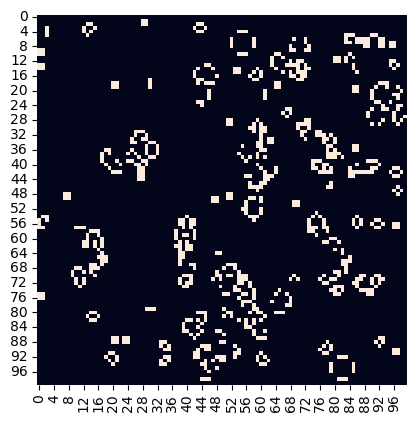

In [4]:
part1, frames1 = light_show(DATA, steps=100, part2=False)
print(part1)
make_animation(frames1)

886


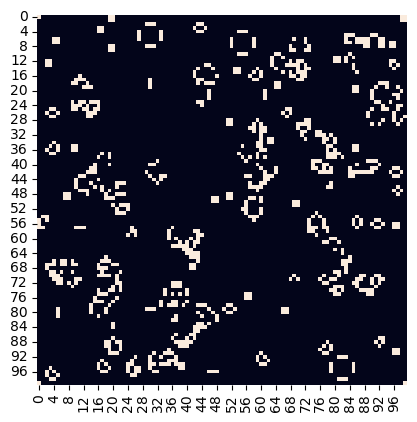

In [5]:
part2, frames2 = light_show(DATA, steps=100, part2=True)
print(part2)
make_animation(frames2)